## Observations and Insights

## Dependencies and starter code

In [776]:
# Dependencies and Setup
%matplotlib notebook
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
Rx_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
Rx_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

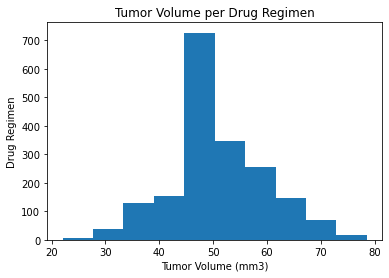

------------- Summary Statistics --------------
The Mean of all Tumor Volume is  50.448380631336505
The Median of all Tumor Volume is 48.95147442
The Mode of all Tumor Vol is ModeResult(mode=array([45.]), count=array([250]))
The Variance of Tumor Volume using the NumPy module is 79.07427999025795
The Standard Deviation of Tumor Volume using the NumPy module is 8.892372011463417
------------- Data Points ---------------------
Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64
------------- Summary Chart--------------------
                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.1286

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [777]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_table =rx_df.groupby('Drug Regimen')
stats = summary_table.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
data_pts = summary_table["Drug Regimen"].count()

mean_ = np.mean(tumor_vol)
median_ = np.median(tumor_vol)
mode_scipy = sts.mode(tumor_vol)
var_ = np.var(tumor_vol)
sd_ = np.std(tumor_vol,ddof = 0)

plt.hist(Rx_df['Tumor Volume (mm3)'])
plt.title("Tumor Volume per Drug Regimen")
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Drug Regimen')
plt.show()


print("------------- Summary Statistics --------------")
print(f"The Mean of all Tumor Volume is  {mean_}")
print(f"The Median of all Tumor Volume is {median_}")
print(f"The Mode of all Tumor Vol is {mode_scipy}")
print(f"The Variance of Tumor Volume using the NumPy module is {var_}")
print(f"The Standard Deviation of Tumor Volume using the NumPy module is {sd_}")
print("------------- Data Points ---------------------")
print(data_pts)
print("------------- Summary Chart--------------------")
print(stats)
stats

## Bar plots

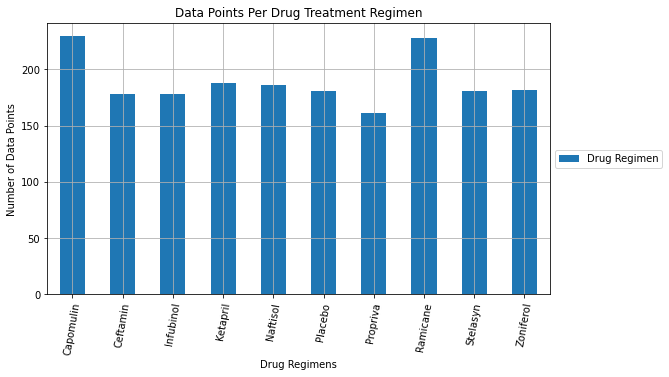

In [778]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

panbar = pd.DataFrame(data_pts)
Bar_plot = panbar.plot.bar(legend=True,rot=80,  figsize=(9,5),align="center")
Bar_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

tick_locations = [value for value in x_axis]

plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimens")
plt.title("Data Points Per Drug Treatment Regimen")
plt.grid()
plt.show()

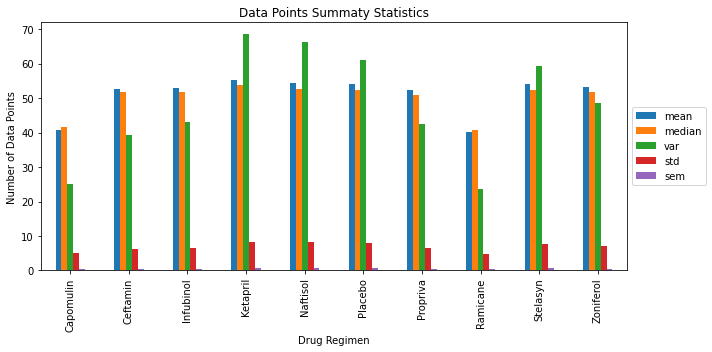

In [779]:
panbar = pd.DataFrame(stats)
Bar_plot = panbar.plot.bar(legend=True,rot=90, figsize=(10,5),align="center")

Bar_plot.legend(loc='center left', bbox_to_anchor=(1, .5))
plt.ylabel("Number of Data Points")
plt.title("Data Points Summaty Statistics")
plt.tight_layout()
plt.show()

## Pie plots

In [789]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

sizes = mvf["Drug Regimen"]
labels = ("Female","Male")
colors = ["pink","green"]
explode = (0.1, 0)

mvf = rx_df.groupby('Sex').count()
mvf

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,935,935,935,935,935,935,935
Male,958,958,958,958,958,958,958


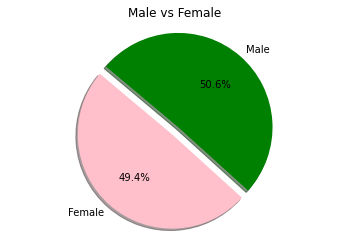

------------Male vs Female Distribution----------
Sex
Female    935
Male      958
Name: Drug Regimen, dtype: int64


In [790]:

plt.title("Male vs Female")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()
print(f"------------Male vs Female Distribution----------")
print(mvf["Drug Regimen"])

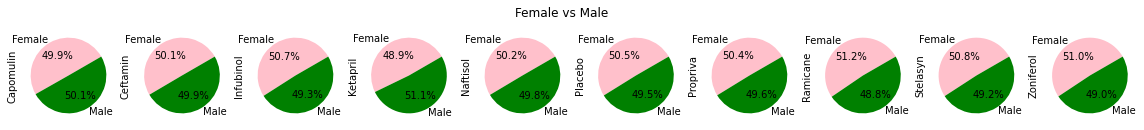

------------  Average Tumor Volume by Sex & Drug  ----------


Drug Regimen  Sex   
Capomulin     Female    40.591944
              Male      40.780898
Ceftamin      Female    52.746823
              Male      52.424661
Infubinol     Female    53.603511
              Male      52.062168
Ketapril      Female    53.478945
              Male      56.019393
Naftisol      Female    54.603113
              Male      54.098033
Placebo       Female    54.542857
              Male      53.376035
Propriva      Female    52.831744
              Male      51.889446
Ramicane      Female    41.452075
              Male      39.623145
Stelasyn      Female    54.951186
              Male      53.194907
Zoniferol     Female    53.953839
              Male      51.881546
Name: Tumor Volume (mm3), dtype: float64

In [793]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Drug_mvf = rx_df.groupby(['Drug Regimen', 'Sex']).mean()

#Create  Data Frame from mvf_Drugs. round(2)
df = pd.DataFrame({'Capomulin':[40.6,40.8],'Ceftamin':[52.7,52.4],'Infubinol':[53.6,52.1],'Ketapril':[53.5,56.0],'Naftisol':[54.6,54.1],'Placebo':[54.5,53.4],'Propriva':[52.8,51.9],'Ramicane':[41.5,39.6],'Stelasyn':[55.0,53.2],'Zoniferol':[54.0,51.9]})
index=['Female','Male']
colors = ["pink","Green"]
plot = df.plot.pie(subplots=True, labels=index,figsize=(20, 2),
                   startangle=30, colors=colors, autopct="%1.1f%%", legend=False, title= 'Female vs Male')

plt.show()
print(f"------------  Average Tumor Volume by Sex & Drug  ----------")
Drug_mvf["Tumor Volume (mm3)"]

In [794]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt

avg_df1 = pd.DataFrame(dict(
        Drug_Regimen='Capomulin; Ceftamin; Infubinol; Ketapril; Naftisol; Placebo; Propriva; Ramicane; Stelasyn; Zoniferol'.split(';'),
        Female=[40.6,52.7,53.6,53.5,54.6,54.5,52.8,41.5,55.0,54.0],
        Male=[40.8,52.4,52.1,56.0,54.1,53.4,51.9,39.6,53.2,51.9]))
avg_df1


,Drug_Regimen,Female,Male
0,Capomulin,40.6,40.8
1,Ceftamin,52.7,52.4
2,Infubinol,53.6,52.1
3,Ketapril,53.5,56.0
4,Naftisol,54.6,54.1
5,Placebo,54.5,53.4
6,Propriva,52.8,51.9
7,Ramicane,41.5,39.6
8,Stelasyn,55.0,53.2
9,Zoniferol,54.0,51.9


Text(0.5, 0.98, 'Female vs Male')

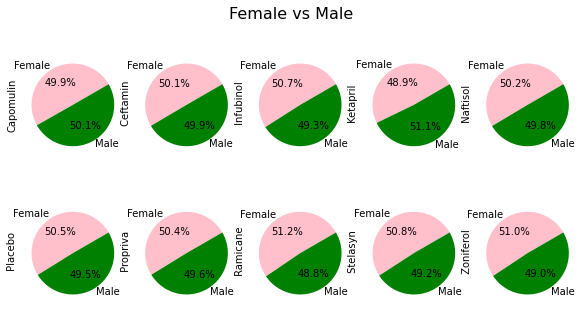

In [795]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, (idx, row) in enumerate(avg_df1.set_index('Drug_Regimen').iterrows()):
    ax = axes[i // 5, i % 5]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, labels=row.index, startangle=30, colors=colors, autopct="%1.1f%%")
    ax.set_ylabel(idx)
    
fig.subplots_adjust(wspace=.1)
fig.suptitle('Female vs Male', fontsize=16)

## Quartiles, outliers and boxplots

Ceftamin Tumor Vol values below 25.36 and above 87.67  could be outliers.
Capomulin Tumor Vol values below 20.7 and above 51.83  could be outliers.
Ramicane Tumor Vol values below 17.91 and above 54.31  could be outliers.
Infubinol Tumor Vol values below 36.83 and above 82.74  could be outliers.


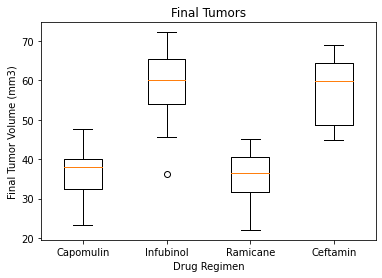

In [796]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

#Calculate the final tumor volume of each mouse across four (Capomulin,Ramicane, Infubinol, and Ceftamin)

cap_df = Rx_df.loc[Rx_df["Drug Regimen"] == "Capomulin",:]
cap_df1 = cap_df.groupby("Mouse ID").max()["Timepoint"]
cap_tumor = pd.DataFrame(cap_df1)
cap_merge = pd.merge(cap_tumor, Rx_df, on=("Mouse ID","Timepoint"),how="left")
cap_final_tumor = cap_merge["Tumor Volume (mm3)"]

ram_df = Rx_df.loc[Rx_df["Drug Regimen"] == "Ramicane",:]
ram_df1 = ram_df.groupby("Mouse ID").max()["Timepoint"]
ram_tumor = pd.DataFrame(ram_df1)
ram_merge = pd.merge(ram_tumor, Rx_df, on=("Mouse ID","Timepoint"),how="left")
ram_final_tumor = ram_merge["Tumor Volume (mm3)"]

inf_df = Rx_df.loc[Rx_df["Drug Regimen"] == "Infubinol",:]
inf_df1 = inf_df.groupby("Mouse ID").max()["Timepoint"]
inf_tumor = pd.DataFrame(inf_df1)
inf_merge = pd.merge(inf_tumor, Rx_df, on=("Mouse ID","Timepoint"),how="left")
inf_final_tumor = inf_merge["Tumor Volume (mm3)"]

prop_df = Rx_df.loc[Rx_df["Drug Regimen"] == "Ceftamin",:]
prop_df1 = prop_df.groupby("Mouse ID").max()["Timepoint"]
prop_tumor = pd.DataFrame(prop_df1)
prop_merge = pd.merge(prop_tumor, Rx_df, on=("Mouse ID","Timepoint"),how="left")
prop_final_tumor = prop_merge["Tumor Volume (mm3)"]


#identify Quantiles

cap_quartiles = cap_final_tumor.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq

ram_quartiles = ram_final_tumor.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq

inf_quartiles = inf_final_tumor.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq

prop_quartiles = prop_final_tumor.quantile([.25,.5,.75])
prop_lowerq = prop_quartiles[0.25]
prop_upperq = prop_quartiles[0.75]
prop_iqr = prop_upperq-prop_lowerq


print(f"Ceftamin Tumor Vol values below {prop_lower_bound} and above {prop_upper_bound}  could be outliers.")
print(f"Capomulin Tumor Vol values below {cap_lower_bound} and above {cap_upper_bound}  could be outliers.")
print(f"Ramicane Tumor Vol values below {ram_lower_bound} and above {ram_upper_bound}  could be outliers.")
print(f"Infubinol Tumor Vol values below {inf_lower_bound} and above {inf_upper_bound}  could be outliers.")

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

cap_lower_bound = round(cap_lowerq - (1.5*cap_iqr),2)
cap_upper_bound = round(cap_upperq + (1.5*cap_iqr),2)
ram_lower_bound = round(ram_lowerq - (1.5*ram_iqr),2)
ram_upper_bound = round(ram_upperq + (1.5*ram_iqr),2)
inf_lower_bound = round(inf_lowerq - (1.5*inf_iqr),2)
inf_upper_bound = round(inf_upperq + (1.5*inf_iqr),2)
prop_lower_bound = round(prop_lowerq - (1.5*prop_iqr),2)
prop_upper_bound = round(prop_upperq + (1.5*prop_iqr),2)

box_plot_df = [cap_final_tumor, inf_final_tumor, ram_final_tumor, prop_final_tumor]

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumors")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")

ax1.boxplot(box_plot_df, labels=["Capomulin","Infubinol","Ramicane", "Ceftamin",])

plt.savefig("boxplot")
plt.show()



## Line and scatter plots

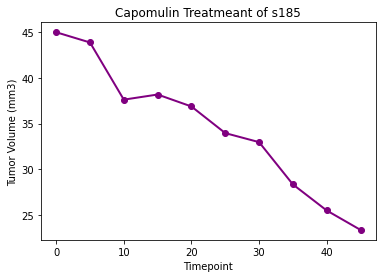

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [797]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

cap_df = Rx_df.loc[Rx_df["Drug Regimen"] == "Capomulin",:]
capline_df = cap_df.loc[cap_df["Mouse ID"] == "s185",:]

cap_time = capline_df["Timepoint"]
cap_tumor= capline_df["Tumor Volume (mm3)"]

plt.title('Capomulin Treatmeant of s185')
plt.plot(cap_time, cap_tumor,linewidth=2, marker="o", color="purple")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()
capline_df.head(20)

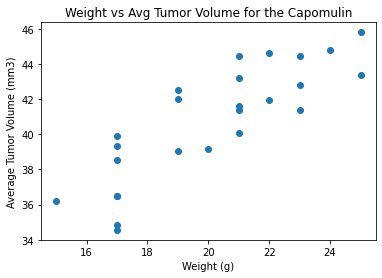

The correlation coefficient between Mouse Weight and Avg. Tumor Vol. is 0.84


In [800]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

cap_avg = cap_df.groupby(['Mouse ID']).mean()

plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Weight vs Avg Tumor Volume for the Capomulin')
plt.savefig('scatterplot')
plt.show()


# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for 

correlation=round(st.pearsonr(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation coefficient between Mouse Weight and Avg. Tumor Vol. is {correlation}")

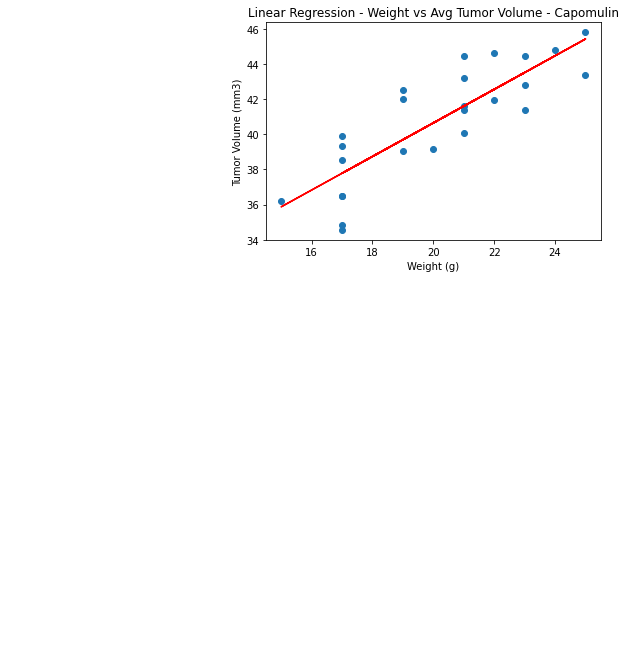

In [799]:
i# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen

from scipy.stats import linregress

cap_avg = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')

x_values = cap_avg['Weight (g)']
y_values = cap_avg['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Linear Regression - Weight vs Avg Tumor Volume - Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()